In [38]:
import csv
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# API Key 信息
api_key = "5a62275f-a3b7-4f83-8b0c-d86b978689c4"
api_secret = "BA4CF2390EDC214921684C6A6FB4FB3D"
api_passphrase = "P@ssw0rdNew1234"

# 初始化 OKX 交易所实例
okx = ccxt.okx({
    'apiKey': api_key,
    'secret': api_secret,
    'password': api_passphrase,
    'enableRateLimit': True,  # 避免触发请求限制
})

## Get the Trading Data using ccxt from the OKX exchange and save it to a CSV file

In [92]:
# 配置导出 CSV 文件路径
output_file = 'okx_trade_history.csv'

# 获取账户所有交易对的历史交易记录（过去三个月）
def fetch_trade_history_for_all_pairs():
    # 获取所有交易对
    markets = okx.load_markets()
    symbols = ['BTC/USDT:USDT','ETH/USDT:USDT','BNB/USDT:USDT','SOL/USDT:USDT']
    
    # 计算三个月前的时间戳
    now = datetime.now()
    three_months_ago = now - timedelta(days=100)
    since_timestamp = int(three_months_ago.timestamp() * 1000)  # 转换为毫秒时间戳

    # 写入 CSV 文件的标题行
    with open(output_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Pair", "Trading ID", "Trading Time", "Timestamp(ms)", "Trading Type", "Trading Price", "Trading Amount", "Trading Cost","PnL","Fee"])

    # 遍历每个交易对，获取交易记录
    for symbol in symbols:
        fetch_since = since_timestamp  # 初始化为三个月前的时间戳
        while fetch_since < int(now.timestamp() * 1000):
            try:
                # 获取特定交易对的交易记录，限制单次请求的数量为 100 条
                trades = okx.fetchMyTrades(symbol, since=fetch_since, limit=100, params={'until':(fetch_since+7*3600*24*1000)})
                print(f'Trading Time: {datetime.fromtimestamp(fetch_since/1000)}')
                if not trades:
                    print(f"{symbol} No more Trading Records.")
                    break  # 如果没有返回数据，则跳出循环
                
                # 将每条交易记录写入 CSV 文件
                with open(output_file, mode='a', newline='', encoding='utf-8') as file:
                    writer = csv.writer(file)
                    for trade in trades:
                        trade_time = datetime.fromtimestamp(trade['timestamp'] / 1000)
                        writer.writerow([
                            symbol,
                            trade['id'],
                            trade_time.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3],  # 精确到毫秒
                            trade['timestamp'],
                            trade['side'],
                            trade['price'],
                            trade['amount'],
                            trade['cost'],
                            trade['info']['fillPnl'],
                            trade['info']['fee']
                        ])
                
                # 更新 `fetch_since` 为最后一笔交易的时间戳，以便获取之后的记录
                fetch_since = int(trades[-1]['timestamp']) + 1  # 加1毫秒避免重复获取
                print(f"{symbol} Successfully fetched the data, continue to fetch data from {datetime.fromtimestamp(fetch_since/1000)}.")

            except Exception as e:
                print(f"Fetching {symbol} error:", e)
                break  # 如果遇到错误则跳出循环

# 执行函数，获取所有交易对的历史交易记录并导出到 CSV 文件
fetch_trade_history_for_all_pairs()

Trading Time: 2024-07-27 17:09:45.471000
BTC/USDT:USDT Successfully fetched the data, continue to fetch data from 2024-08-03 16:20:14.839000.
Trading Time: 2024-08-03 16:20:14.839000
BTC/USDT:USDT Successfully fetched the data, continue to fetch data from 2024-08-09 22:45:15.681000.
Trading Time: 2024-08-09 22:45:15.681000
BTC/USDT:USDT Successfully fetched the data, continue to fetch data from 2024-08-16 20:27:13.480000.
Trading Time: 2024-08-16 20:27:13.480000
BTC/USDT:USDT Successfully fetched the data, continue to fetch data from 2024-08-23 14:55:16.389000.
Trading Time: 2024-08-23 14:55:16.389000
BTC/USDT:USDT Successfully fetched the data, continue to fetch data from 2024-08-30 14:46:12.380000.
Trading Time: 2024-08-30 14:46:12.380000
BTC/USDT:USDT Successfully fetched the data, continue to fetch data from 2024-09-06 12:56:08.723000.
Trading Time: 2024-09-06 12:56:08.723000
BTC/USDT:USDT Successfully fetched the data, continue to fetch data from 2024-09-12 02:25:14.559000.
Tradin

## Data Analysis for OKX Address

This notebook is used to analyze the data of OKX Address.

In [293]:
df = pd.read_csv('okx_trade_history_20240801-20241104.csv')
history_df = pd.read_csv('Full NAV of Big4 Strategy.csv')
history_df['date_time'] = pd.to_datetime(history_df['date_time'], format='%d/%m/%Y')
history_df_filtered = history_df[history_df['date_time'] >= '2024-01-01']
history_df_filtered = history_df_filtered[history_df_filtered['date_time'] < '2024-08-01'].iloc[:,0:2]
history_df_filtered['date_time'] = history_df_filtered['date_time']
history_df_filtered.set_index('date_time', inplace=True)

df.head()

,Pair,Trading ID,Trading Time,Timestamp(ms),Trading Type,Trading Price,Trading Amount,Trading Cost,PnL,Fee
0,BTC/USDT:USDT,958994817,2024-08-01 00:31:47.771,1722443507771,buy,66511.4,3.0,1995.342,0.313154,-0.199534
1,BTC/USDT:USDT,959237852,2024-08-01 03:30:16.181,1722454216181,sell,65771.3,1.0,657.713,0.000000,-0.065771
2,BTC/USDT:USDT,959376531,2024-08-01 04:05:16.088,1722456316088,sell,65372.7,2.0,1307.454,0.000000,-0.130745
3,BTC/USDT:USDT,959463372,2024-08-01 04:35:16.637,1722458116637,sell,64684.9,2.0,1293.698,0.000000,-0.129370
4,BTC/USDT:USDT,959594519,2024-08-01 06:10:15.276,1722463815276,sell,64857.6,1.0,648.576,0.000000,-0.064858


In [294]:
history_df_filtered.head()

,total_return (%)
date_time,
2024-01-01,-0.100933
2024-01-02,0.185677
2024-01-03,-1.857005
2024-01-04,1.528058
2024-01-05,0.036958


In [295]:
# 将 'Trading Time' 列转换为日期时间格式
df['Trading Time'] = pd.to_datetime(df['Trading Time'])

# 提取日、月份
df['Day'] = df['Trading Time'].dt.to_period('D')
df['Month'] = df['Trading Time'].dt.to_period('M')

# 按日、月份计算 PnL 的总和
Daily_pnl_sum = df.groupby('Day')['PnL'].sum()
monthly_pnl_sum = df.groupby('Month')['PnL'].sum()
Daily_pnl_sum.head()

Day
2024-08-01      22.291127
2024-08-02      32.986876
2024-08-03      72.068880
2024-08-04    1858.750717
2024-08-05    1323.081242
Freq: D, Name: PnL, dtype: float64

In [296]:
monthly_pnl_sum.head()

Month
2024-08    3423.945665
2024-09     354.262184
2024-10     136.539200
2024-11      -7.088700
Freq: M, Name: PnL, dtype: float64

In [297]:
balance_aug = monthly_pnl_sum.iloc[0] / 0.1116

return_list = []
for i in range(0, len(Daily_pnl_sum)):
    return_list.append((Daily_pnl_sum.iloc[i] / balance_aug)*100)
    balance_aug = balance_aug + Daily_pnl_sum.iloc[i]
    
return_list = pd.DataFrame({'total_return (%)':return_list}, index = pd.to_datetime(Daily_pnl_sum.index.to_timestamp()))
history_df_filtered = pd.concat([history_df_filtered, return_list], axis=0)

NAV_list = [1]
for i in range(0, len(history_df_filtered)):
    NAV_list.append((history_df_filtered.iloc[i][0]/100 + 1) * NAV_list[i])

history_df_filtered['NAV'] = NAV_list[1:]
history_df_filtered

/var/folders/c2/v2_6wt3d3rd55t34j5wwjdfr0000gn/T/ipykernel_79408/1352105399.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  NAV_list.append((history_df_filtered.iloc[i][0]/100 + 1) * NAV_list[i])


,total_return (%),NAV
2024-01-01,-0.100933,0.998991
2024-01-02,0.185677,1.000846
2024-01-03,-1.857005,0.982260
2024-01-04,1.528058,0.997269
2024-01-05,0.036958,0.997638
...,...,...
2024-10-31,0.211983,2.214160
2024-11-01,-0.040350,2.213267
2024-11-02,0.000000,2.213267
2024-11-03,0.002964,2.213332


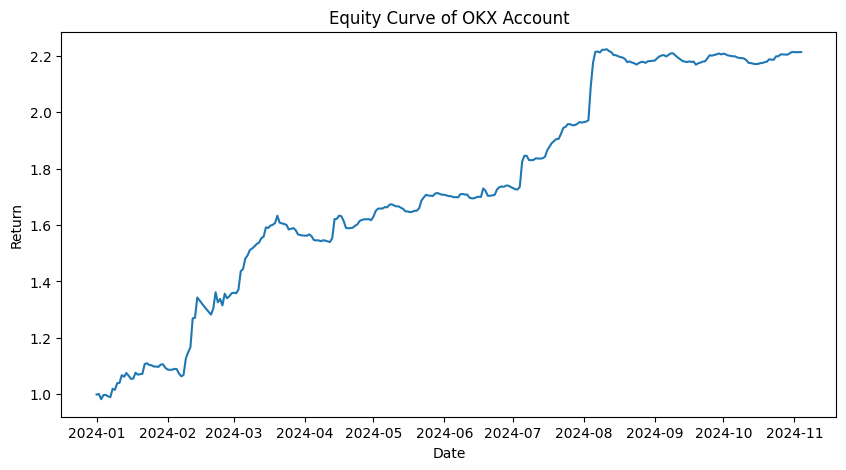

In [298]:
plt.figure(figsize=(10, 5))
plt.plot(history_df_filtered.index, history_df_filtered['NAV'])
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Equity Curve of OKX Account')
plt.show()

## Calculate the Monthly PnL for the OKX address

In [299]:
balance_base = balance_aug / history_df_filtered.loc["2024-08-01"]["NAV"]
balance_list = []
PnL_list = [0]
for i in range(0, len(history_df_filtered)):
    balance_list.append(balance_base * history_df_filtered.iloc[i]["NAV"])
history_df_filtered["Balance"] = balance_list

for j in range(1, len(history_df_filtered)):
    PnL_list.append(history_df_filtered.iloc[j]["Balance"] - history_df_filtered.iloc[j-1]["Balance"])
history_df_filtered["PnL"] = PnL_list

history_df_filtered.head()

,total_return (%),NAV,Balance,PnL
2024-01-01,-0.100933,0.998991,17584.038072,0.000000
2024-01-02,0.185677,1.000846,17616.687607,32.649535
2024-01-03,-1.857005,0.982260,17289.544846,-327.142761
2024-01-04,1.528058,0.997269,17553.739128,264.194282
2024-01-05,0.036958,0.997638,17560.226696,6.487568


In [300]:
monthly_pnl = history_df_filtered['PnL'].resample('ME').sum()
monthly_pnl.name = 'Monthly PnL'
print("Monthly PnL:")
print(monthly_pnl)

Monthly PnL:
2024-01-31    1673.597184
2024-02-29    4640.658999
2024-03-31    3614.110650
2024-04-30     954.798659
2024-05-31    1588.855909
2024-06-30     487.057923
2024-07-31    4019.945648
2024-08-31    3857.237836
2024-09-30     399.093220
2024-10-31     153.817911
2024-11-30      -7.985758
Freq: ME, Name: Monthly PnL, dtype: float64


In [301]:
daily_max_dd = history_df_filtered['total_return (%)'].resample('ME').min()
daily_max_dd.name = 'Daily Max Drawdown'
print("Daily Max Drawdown (%):\n")
print(daily_max_dd)

Daily Max Drawdown (%):

2024-01-31   -1.857005
2024-02-29   -2.596612
2024-03-31   -1.491191
2024-04-30   -1.520873
2024-05-31   -0.523640
2024-06-30   -1.028291
2024-07-31   -0.804895
2024-08-31   -0.521307
2024-09-30   -0.492095
2024-10-31   -0.459683
2024-11-30   -0.040350
Freq: ME, Name: Daily Max Drawdown, dtype: float64


In [303]:
print(f"Total PnL of the address is: {sum(monthly_pnl)}")
print(f"Total Return of the address this year till now is: {(history_df_filtered.iloc[-1]['NAV'] / history_df_filtered.iloc[0]['NAV'] - 1) * 100}%")

Total PnL of the address is: 21381.188181159097
Total Return of the address this year till now is: 121.59430099788571%
